# Content List: 

## 1. Data and library imports:
   - Importing pandas as pd
   - Importing numpy as np
   - Importing seaborn as sns
   - Importing matplotlib.pyplot as plt
   - Importing os
   - Importing sklearn and specific modules from it

## 2. Data reading and information:
   - Reading the CSV file into a DataFrame
   - Displaying information about the DataFrame using `df.info()`

## 3. Data cleaning and exploration:
   - Checking for missing values in the DataFrame using `df.isnull().sum()`
   - Mapping the 'CrashDay' column to numeric values using a dictionary
   - Checking for duplicates in the DataFrame
   - Creating scatterplots to visualize relationships between variables

## 4. Scatterplot matrix:
   - Selecting numeric columns from the DataFrame
   - Creating a scatterplot matrix using `scatter_matrix()`

## 5. Regression analysis:
   - Preparing the data for regression by reshaping variables into NumPy arrays
   - Splitting the data into training and test sets using `train_test_split()`
   - Creating a LinearRegression object and fitting it to the training set
   - Predicting the values of y using the test set
   - Plotting the regression line on the test set data
   - Calculating and printing model summary statistics (mean squared error, R2 score)
   - Creating a dataframe comparing actual and predicted values of y

## 6. Comparing regression fit on the training set:
   - Predicting the values of y using the training set
   - Calculating and printing model summary statistics for the training set
   - Visualizing the regression fit on the training set using a scatterplot

## 1. Data and library imports:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [2]:
path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Prepared Data'

## 2. Data reading and information:

In [6]:
df = pd.read_csv(os.path.join(path,'NCDOT_BikePedCrash.csv'))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AmbulanceR          11044 non-null  object 
 1   BikeAge             11044 non-null  float64
 2   BikeAlcFlg          11044 non-null  object 
 3   BikeDir             11044 non-null  object 
 4   BikeInjury          11044 non-null  object 
 5   BikeSex             11044 non-null  object 
 6   City                11044 non-null  object 
 7   County              11044 non-null  object 
 8   CrashAlcoh          11044 non-null  object 
 9   CrashDay            11044 non-null  object 
 10  CrashGrp            11044 non-null  object 
 11  CrashHour           11044 non-null  int64  
 12  CrashMonth          11044 non-null  object 
 13  CrashType           11044 non-null  object 
 14  CrashYear           11044 non-null  int64  
 15  DrvrAge             11044 non-null  float64
 16  Drvr

In [7]:
df.columns

Index(['AmbulanceR', 'BikeAge', 'BikeAlcFlg', 'BikeDir', 'BikeInjury',
       'BikeSex', 'City', 'County', 'CrashAlcoh', 'CrashDay', 'CrashGrp',
       'CrashHour', 'CrashMonth', 'CrashType', 'CrashYear', 'DrvrAge',
       'DrvrAlcFlg', 'DrvrInjury', 'DrvrSex', 'DrvrVehTyp', 'HitRun',
       'Latitude', 'Longitude', 'RdConditio', 'SpeedLimit', 'TraffCntrl',
       'Weather', 'Workzone', 'DrvrAgeImputedFlag', 'BikeAgeImputedFlag'],
      dtype='object')

In [8]:
df.head(20)

,AmbulanceR,BikeAge,BikeAlcFlg,BikeDir,BikeInjury,BikeSex,City,County,CrashAlcoh,CrashDay,...,HitRun,Latitude,Longitude,RdConditio,SpeedLimit,TraffCntrl,Weather,Workzone,DrvrAgeImputedFlag,BikeAgeImputedFlag
0,Yes,11.0,No,With Traffic,B: Suspected Minor Injury,Male,Durham,Durham,No,Tuesday,...,No,36.039490,-78.883896,Dry,30 - 35 MPH,No Control Present,Clear,No,0,0
1,Yes,20.0,No,Facing Traffic,C: Possible Injury,Male,Cary,Wake,No,Friday,...,No,35.751118,-78.782800,Dry,30 - 35 MPH,Stop And Go Signal,Clear,No,0,0
2,Yes,37.0,No,Unknown,B: Suspected Minor Injury,Male,Stallings,Union,No,Monday,...,No,35.084732,-80.697820,Dry,20 - 25 MPH,No Control Present,Cloudy,No,0,0
3,Yes,30.0,No,With Traffic,C: Possible Injury,Male,Salisbury,Rowan,No,Friday,...,Yes,35.684400,-80.479320,Dry,30 - 35 MPH,No Control Present,Cloudy,No,1,0
4,Yes,45.0,No,With Traffic,B: Suspected Minor Injury,Male,Fayetteville,Cumberland,No,Friday,...,No,34.999428,-78.904450,Dry,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,0,0
5,Yes,58.0,No,With Traffic,B: Suspected Minor Injury,Male,Salisbury,Rowan,No,Wednesday,...,Yes,35.666668,-80.477590,Dry,30 - 35 MPH,Stop And Go Signal,Clear,No,1,0
6,No,51.0,Yes,With Traffic,A: Suspected Serious Injury,Male,None - Rural Crash,Randolph,Yes,Saturday,...,No,35.839287,-79.590080,Dry,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Cloudy,No,0,0
7,Yes,13.0,No,With Traffic,C: Possible Injury,Male,Beaufort,Carteret,No,Sunday,...,No,34.717346,-76.656750,Dry,20 - 25 MPH,Stop Sign,Clear,No,0,0
8,Yes,18.0,No,With Traffic,C: Possible Injury,Male,Lenoir,Caldwell,No,Monday,...,Yes,35.890682,-81.576490,Dry,Unknown,No Control Present,Cloudy,No,1,0
9,Yes,19.0,Yes,Facing Traffic,A: Suspected Serious Injury,Male,Cary,Wake,Yes,Saturday,...,No,35.790670,-78.770920,Dry,30 - 35 MPH,No Control Present,Clear,No,0,0


In [9]:
df.shape

(11044, 30)

##### Missing values

## 3. Data cleaning and exploration:

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

AmbulanceR            0
BikeAge               0
BikeAlcFlg            0
BikeDir               0
BikeInjury            0
BikeSex               0
City                  0
County                0
CrashAlcoh            0
CrashDay              0
CrashGrp              0
CrashHour             0
CrashMonth            0
CrashType             0
CrashYear             0
DrvrAge               0
DrvrAlcFlg            0
DrvrInjury            0
DrvrSex               0
DrvrVehTyp            0
HitRun                0
Latitude              0
Longitude             0
RdConditio            0
SpeedLimit            0
TraffCntrl            0
Weather               0
Workzone              0
DrvrAgeImputedFlag    0
BikeAgeImputedFlag    0
dtype: int64

In [17]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['CrashDayNumeric'] = df['CrashDay'].map(day_mapping)


##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(11044,)

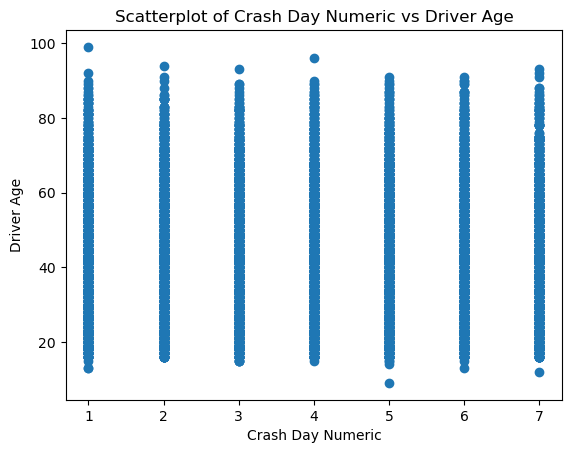

In [20]:
plt.scatter(df['CrashDayNumeric'], df['DrvrAge'])
plt.xlabel('Crash Day Numeric')
plt.ylabel('Driver Age')
plt.title('Scatterplot of Crash Day Numeric vs Driver Age')
plt.show()


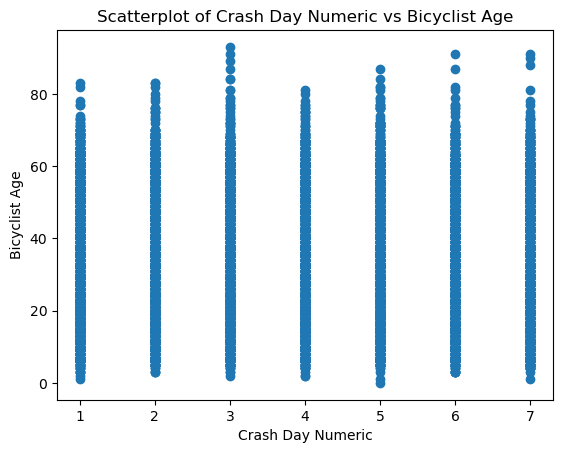

In [21]:
plt.scatter(df['CrashDayNumeric'], df['BikeAge'])
plt.xlabel('Crash Day Numeric')
plt.ylabel('Bicyclist Age')
plt.title('Scatterplot of Crash Day Numeric vs Bicyclist Age')
plt.show()


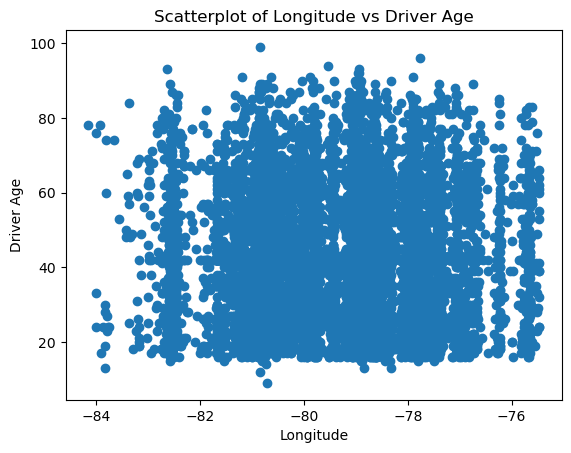

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df['Longitude'], df['DrvrAge'])
plt.xlabel('Longitude')
plt.ylabel('Driver Age')
plt.title('Scatterplot of Longitude vs Driver Age')
plt.show()


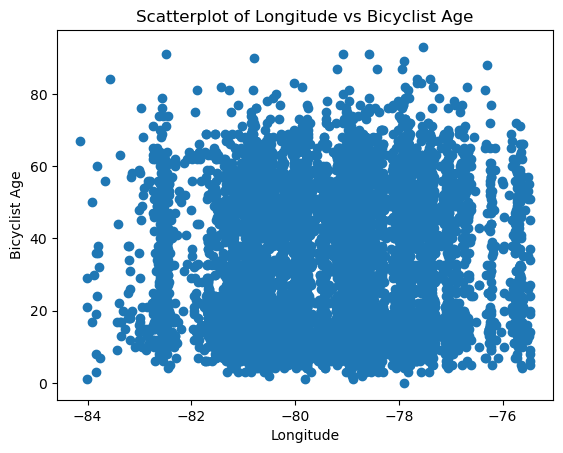

In [23]:
plt.scatter(df['Longitude'], df['BikeAge'])
plt.xlabel('Longitude')
plt.ylabel('Bicyclist Age')
plt.title('Scatterplot of Longitude vs Bicyclist Age')
plt.show()


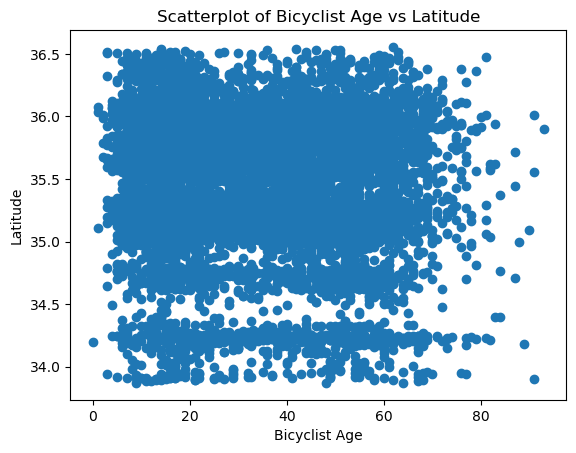

In [24]:
plt.scatter(df['BikeAge'], df['Latitude'])
plt.xlabel('Bicyclist Age')
plt.ylabel('Latitude')
plt.title('Scatterplot of Bicyclist Age vs Latitude')
plt.show()


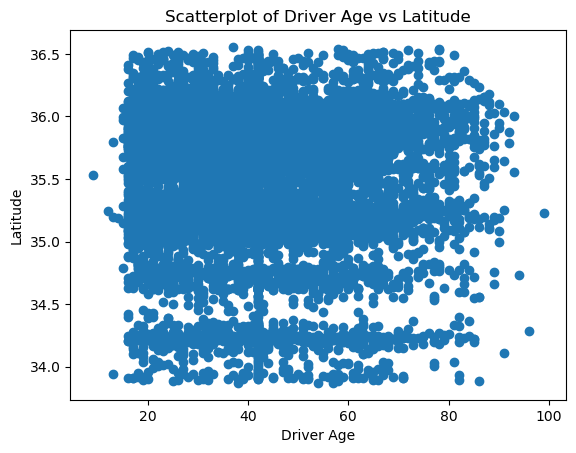

In [25]:
plt.scatter(df['DrvrAge'], df['Latitude'])
plt.xlabel('Driver Age')
plt.ylabel('Latitude')
plt.title('Scatterplot of Driver Age vs Latitude')
plt.show()


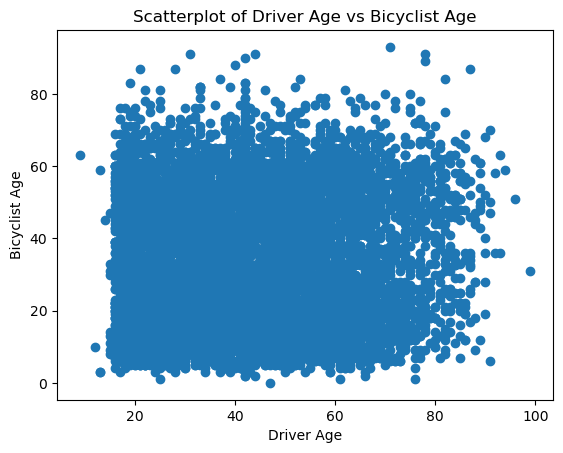

In [15]:
plt.scatter(df['DrvrAge'], df['BikeAge'])
plt.xlabel('Driver Age')
plt.ylabel('Bicyclist Age')
plt.title('Scatterplot of Driver Age vs Bicyclist Age')
plt.show()


## 4. Scatterplot matrix:

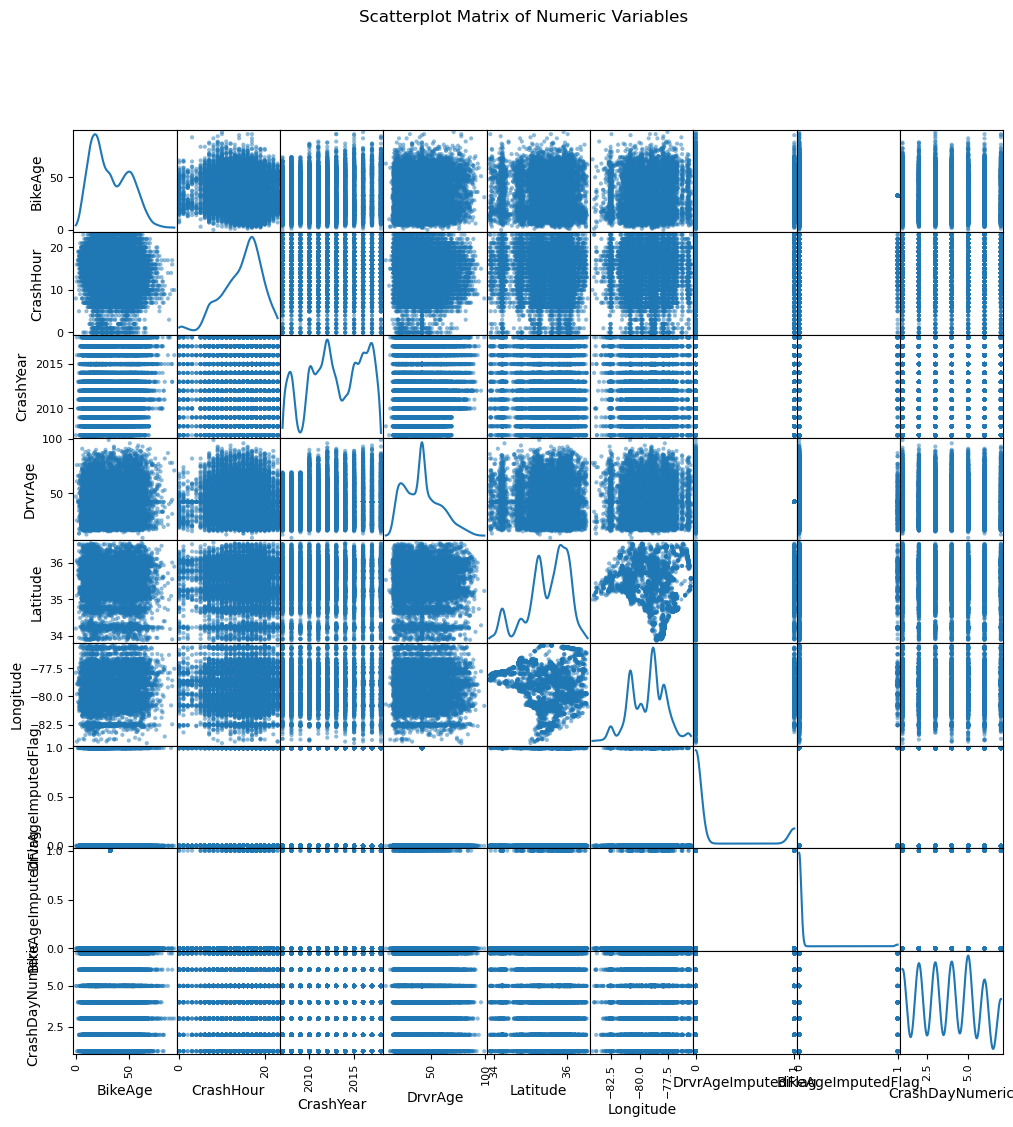

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Create the scatterplot matrix
scatter_matrix(numeric_columns, figsize=(12, 12), diagonal='kde')

# Add titles to the subplots
plt.suptitle('Scatterplot Matrix of Numeric Variables')

# Show the plot
plt.show()


My prediction is that there will be a negative correlation between bicylist age and crash hour as young drivers tend to ride later in the day. 

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['CrashHour'].values.reshape(-1,1)
y = df['BikeAge'].values.reshape(-1,1)

In [28]:
X

array([[16],
       [ 9],
       [17],
       ...,
       [20],
       [17],
       [12]], dtype=int64)

In [29]:
y

array([[11.        ],
       [20.        ],
       [37.        ],
       ...,
       [48.        ],
       [21.        ],
       [32.52649525]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Regression analysis:


In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

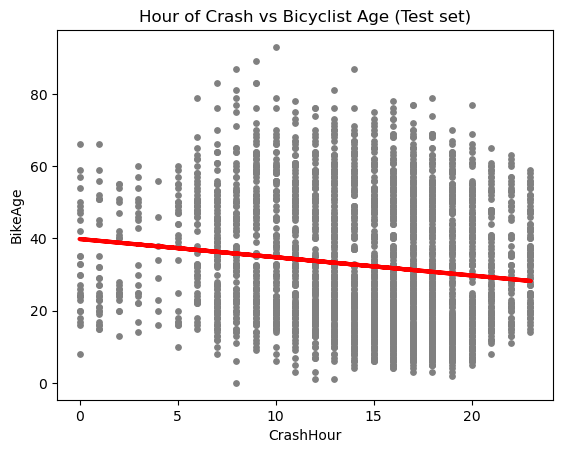

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Hour of Crash vs Bicyclist Age (Test set)')
plot_test.xlabel('CrashHour')
plot_test.ylabel('BikeAge')
plot_test.show()

The line seems to fit the data pretty well, the values seem to be just as above from the line as below

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.50441224]]
Mean squared error:  313.47709086349874
R2 score:  0.015060765457284075


## 6. Comparing regression fit on the training set:

In [38]:
y_predicted

array([[38.31441614],
       [31.25264481],
       [31.25264481],
       ...,
       [31.25264481],
       [31.25264481],
       [31.25264481]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45.000000,38.314416
1,17.000000,31.252645
2,39.000000,31.252645
3,6.000000,31.252645
4,11.000000,31.252645
5,13.000000,31.252645
6,36.000000,28.226171
7,45.000000,30.748233
8,49.000000,33.270294
9,48.000000,35.287943


I would say the model is not accurate especially with something like age, the difference seems to put people in a completely different decade at times

##### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.50441224]]
Mean squared error:  299.2493808259073
R2 score:  0.018865457122066664


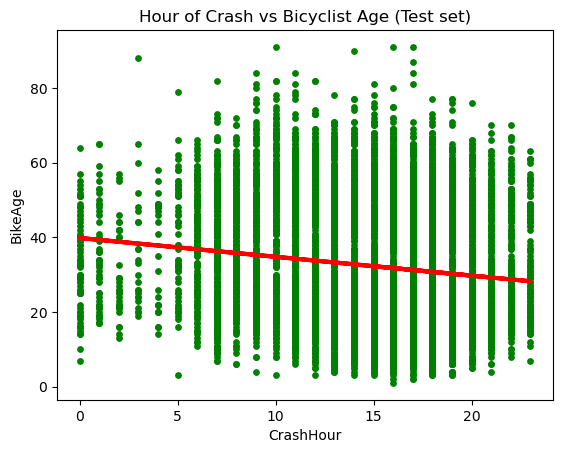

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Hour of Crash vs Bicyclist Age (Test set)')
plot_test.xlabel('CrashHour')
plot_test.ylabel('BikeAge')
plot_test.show()